In [1]:
import importlib
import DataGenerator
import ShipDetection
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.layers import Input
from keras.optimizers import Adam
import pandas as pd
import glob
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

Set local variables

In [2]:
imgWidth = 256
imgHeight = 256
batch_size = 8
trainDir = "data/train/"
validDir = "data/validation/"

Set paths to data

In [3]:
trainPaths = glob.glob(trainDir + "*.jpg")
validationPaths = glob.glob(validDir + "*.jpg")

In [4]:
train_ship_segmentations_v2 = pd.read_csv("train_ship_segmentations_v2.csv")
train_ship_segmentations_v2.set_index("ImageId", inplace=True)

In [5]:
importlib.reload(DataGenerator)
importlib.reload(ShipDetection)

<module 'ShipDetection' from 'D:\\AdankoProject\\Project\\AirbusAhipDetectionTA\\ShipDetection.py'>

Create Data generators for model

In [6]:
training_generator = DataGenerator.DataGenerator(trainPaths,
                                                 train_ship_segmentations_v2,
                                                 batch_size=batch_size)
validation_generator = DataGenerator.DataGenerator(validationPaths,
                                                   train_ship_segmentations_v2,
                                                   batch_size=batch_size)

Create model

In [7]:
inputImg = Input((imgWidth, imgHeight, 3), name='img')
model = ShipDetection.get_unet(inputImg)
model.compile(optimizer=Adam(), loss=ShipDetection.dice_coef_loss)

In [8]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 img (InputLayer)               [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 256, 256, 16  448         ['img[0][0]']                    
                                )                                                                 
                                                                                                  
 batch_normalization_1 (BatchNo  (None, 256, 256, 16  64         ['conv2d_1[0][0]']               
 rmalization)                   )                                                             

Set fitting callbacks

In [9]:
callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ReduceLROnPlateau(factor=0.1, patience=5, min_lr=0.00001, verbose=1),
    ModelCheckpoint('model1.h5', verbose=1, save_best_only=True, save_weights_only=True)
]

Fit model

In [10]:
tf.debugging.set_log_device_placement(True)

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
results = model.fit(training_generator,
            validation_data=validation_generator,
            epochs=5,
            callbacks=callbacks
                    )

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp i

In [ ]:
testImage = imread(glob.glob(trainDir+"/*.jpg")[31])
testImage2 = imread(glob.glob(trainDir+"/*.jpg")[26])
a = np.array([testImage,testImage2])

In [13]:
pr = model.predict(a)

1/1 [==============================] - 1s 779ms/step


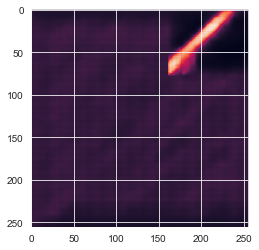

In [14]:
plt.imshow(pr[0])

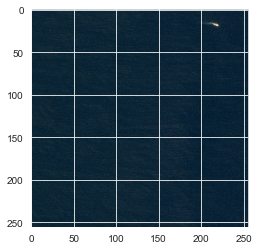

In [15]:
plt.imshow(testImage)